In [145]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")  
import matplotlib as mpl

from IPython.display import display




Import first 2016 dataset

In [91]:
#read 2016 property file
train2016_df = pd.read_csv("../Data/train_2016_v2.csv")
train2016_df.columns

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

In [92]:
train2016_df.shape

(90275, 3)

In [93]:
display(train2016_df.dtypes)

parcelid             int64
logerror           float64
transactiondate     object
dtype: object

In [94]:
display(train2016_df.head())

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [100]:
train2016_df["formatedDate"] = pd.to_datetime(train2016_df.transactiondate)
train2016_df["transactionMonth"] = train2016_df.formatedDate.dt.month
display(train2016_df.head(10))
train2016_df.dtypes

,parcelid,logerror,transactiondate,formatedDate,transactionMonth
0,11016594,0.0276,2016-01-01,2016-01-01,1
1,14366692,-0.1684,2016-01-01,2016-01-01,1
2,12098116,-0.0040,2016-01-01,2016-01-01,1
3,12643413,0.0218,2016-01-02,2016-01-02,1
4,14432541,-0.0050,2016-01-02,2016-01-02,1
5,11509835,-0.2705,2016-01-02,2016-01-02,1
6,12286022,0.0440,2016-01-02,2016-01-02,1
7,17177301,0.1638,2016-01-02,2016-01-02,1
8,14739064,-0.0030,2016-01-02,2016-01-02,1
9,14677559,0.0843,2016-01-03,2016-01-03,1


parcelid                     int64
logerror                   float64
transactiondate             object
formatedDate        datetime64[ns]
transactionMonth             int64
dtype: object

Import second 2016 dataset

In [101]:
data2016_df = pd.read_csv("../Data/properties_2016.csv")
data2016_df.head(10)

/Users/wenhuizhang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [102]:
data2016_df.shape

(2985217, 58)

In [103]:
problem_df = data2016_df.iloc[:,[22,32,34,49,55]]
problem_df.head(20)

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag
0,NaN,010D,NaN,NaN,NaN
1,NaN,0109,LCA11*,NaN,NaN
2,NaN,1200,LAC2,NaN,NaN
3,NaN,1200,LAC2,NaN,NaN
4,NaN,1210,LAM1,NaN,NaN
5,NaN,1210,LAC4,NaN,NaN
6,NaN,010V,LAC2,NaN,NaN
7,NaN,1210,BUC4YY,NaN,NaN
8,NaN,010D,BUR1*,NaN,NaN
9,NaN,1210,SFC2*,NaN,NaN


In [104]:
data2016_df.drop(data2016_df.columns[[22,32,34,49,55]], axis=1, inplace=True)


In [105]:
data2016_df.shape

(2985217, 53)

In [106]:
data2016_df = data2016_df.dropna(axis=1, how='all')
data2016_df.shape

(2985217, 53)

In [107]:
data2016_df.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,NaN,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,1947.0,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,NaN,1943.0,1.0,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,1946.0,1.0,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,NaN,1978.0,1.0,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN


In [108]:
data2016_df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [109]:
data2016_df.dtypes.value_counts()

float64    52
int64       1
dtype: int64

In [110]:
mask_type = data2016_df.dtypes == int
mask_type

parcelid                         True
airconditioningtypeid           False
architecturalstyletypeid        False
basementsqft                    False
bathroomcnt                     False
bedroomcnt                      False
buildingclasstypeid             False
buildingqualitytypeid           False
calculatedbathnbr               False
decktypeid                      False
finishedfloor1squarefeet        False
calculatedfinishedsquarefeet    False
finishedsquarefeet12            False
finishedsquarefeet13            False
finishedsquarefeet15            False
finishedsquarefeet50            False
finishedsquarefeet6             False
fips                            False
fireplacecnt                    False
fullbathcnt                     False
garagecarcnt                    False
garagetotalsqft                 False
heatingorsystemtypeid           False
latitude                        False
longitude                       False
lotsizesquarefeet               False
poolcnt     

In [111]:
full2016_df = pd.merge(train2016_df, data2016_df, how = 'inner', on = ['parcelid'])
full2016_df.shape

(90275, 57)

In [121]:
full2016_df.head(10)

,parcelid,logerror,transactiondate,formatedDate,transactionMonth,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,...,NaN,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,...,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN
2,12098116,-0.0040,2016-01-01,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,...,NaN,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,...,NaN,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,...,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02,2016-01-02,1,1.0,NaN,NaN,4.0,4.0,...,NaN,1982.0,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02,2016-01-02,1,NaN,NaN,NaN,1.0,2.0,...,NaN,1939.0,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02,2016-01-02,1,NaN,NaN,NaN,2.5,3.0,...,NaN,1994.0,2.0,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-02,2016-01-02,1,NaN,NaN,NaN,1.0,2.0,...,NaN,1984.0,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,6.059042e+13
9,14677559,0.0843,2016-01-03,2016-01-03,1,NaN,NaN,NaN,2.0,2.0,...,NaN,1977.0,1.0,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,6.059063e+13


In [113]:
type_col_name = full2016_df.columns[full2016_df.columns.str.contains(pat = 'type')]

In [114]:
print(type_col_name)

Index(['airconditioningtypeid', 'architecturalstyletypeid',
       'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid',
       'heatingorsystemtypeid', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'storytypeid', 'typeconstructiontypeid'],
      dtype='object')


In [115]:
type_df = full2016_df[type_col_name]

In [116]:
type_df.head(10)

,airconditioningtypeid,architecturalstyletypeid,buildingclasstypeid,buildingqualitytypeid,decktypeid,heatingorsystemtypeid,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,storytypeid,typeconstructiontypeid
0,1.0,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,261.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,NaN
2,1.0,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,261.0,NaN,NaN
3,1.0,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,266.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,261.0,NaN,NaN
5,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,261.0,NaN,NaN
6,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,261.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.0,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.0,NaN,NaN


In [117]:
type_df.shape

(90275, 12)

In [118]:
cnt_col_name = full2016_df.columns[full2016_df.columns.str.contains(pat = 'cnt')]
cnt_df = full2016_df[cnt_col_name]
cnt_df.head(10)

,bathroomcnt,bedroomcnt,fireplacecnt,fullbathcnt,garagecarcnt,poolcnt,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt
0,2.0,3.0,NaN,2.0,NaN,NaN,0.0,1.0,122754.0,360170.0,237416.0
1,3.5,4.0,NaN,3.0,2.0,NaN,0.0,NaN,346458.0,585529.0,239071.0
2,3.0,2.0,NaN,3.0,NaN,NaN,0.0,1.0,61994.0,119906.0,57912.0
3,2.0,2.0,NaN,2.0,NaN,NaN,0.0,1.0,171518.0,244880.0,73362.0
4,2.5,4.0,NaN,2.0,2.0,1.0,8.0,NaN,169574.0,434551.0,264977.0
5,4.0,4.0,NaN,4.0,NaN,NaN,0.0,1.0,880650.0,2447951.0,1567301.0
6,1.0,2.0,NaN,1.0,NaN,NaN,0.0,1.0,64549.0,111521.0,46972.0
7,2.5,3.0,1.0,2.0,2.0,NaN,6.0,NaN,107000.0,306000.0,199000.0
8,1.0,2.0,NaN,1.0,1.0,NaN,0.0,NaN,66834.0,210064.0,143230.0
9,2.0,2.0,NaN,2.0,1.0,NaN,5.0,NaN,109977.0,190960.0,80983.0


In [120]:
cnt_df.shape

(90275, 11)

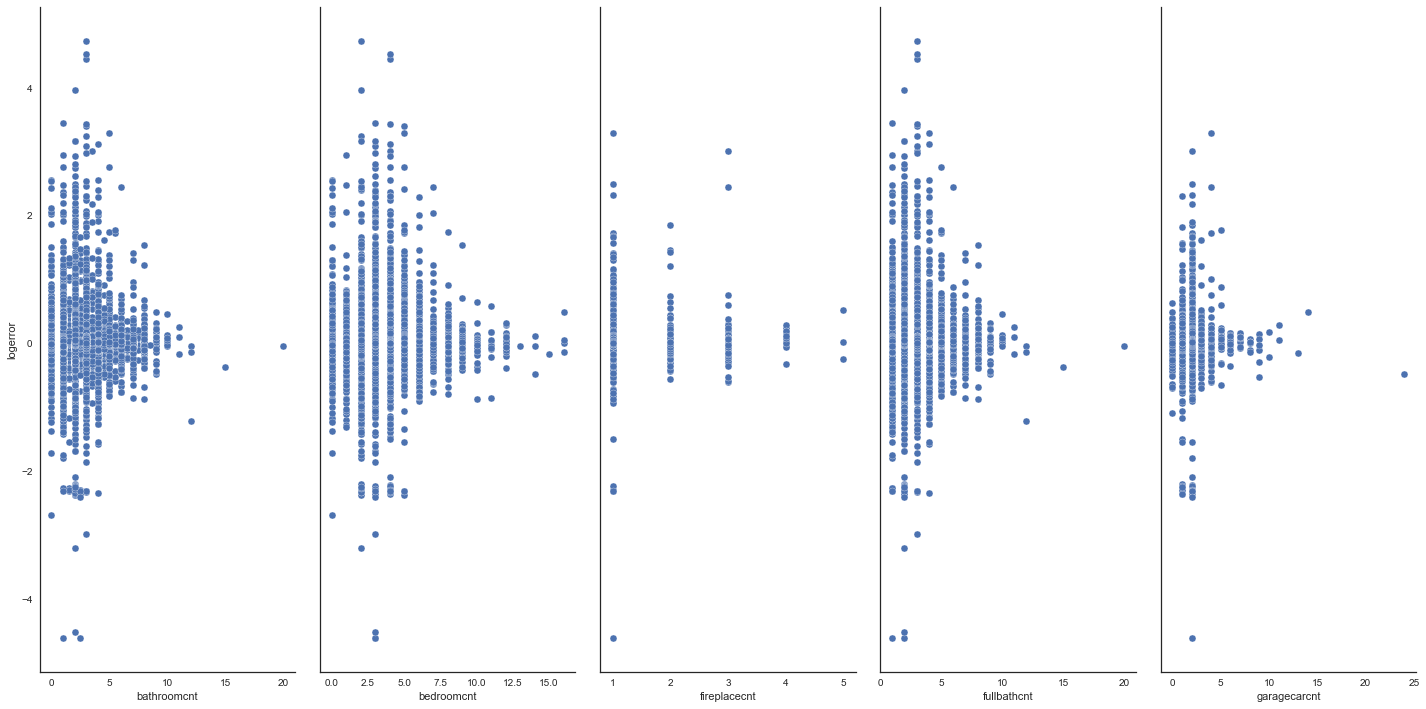

In [133]:
sns.pairplot(full2016_df, x_vars=cnt_col_name[0:5], y_vars='logerror', size=10, aspect=0.4);

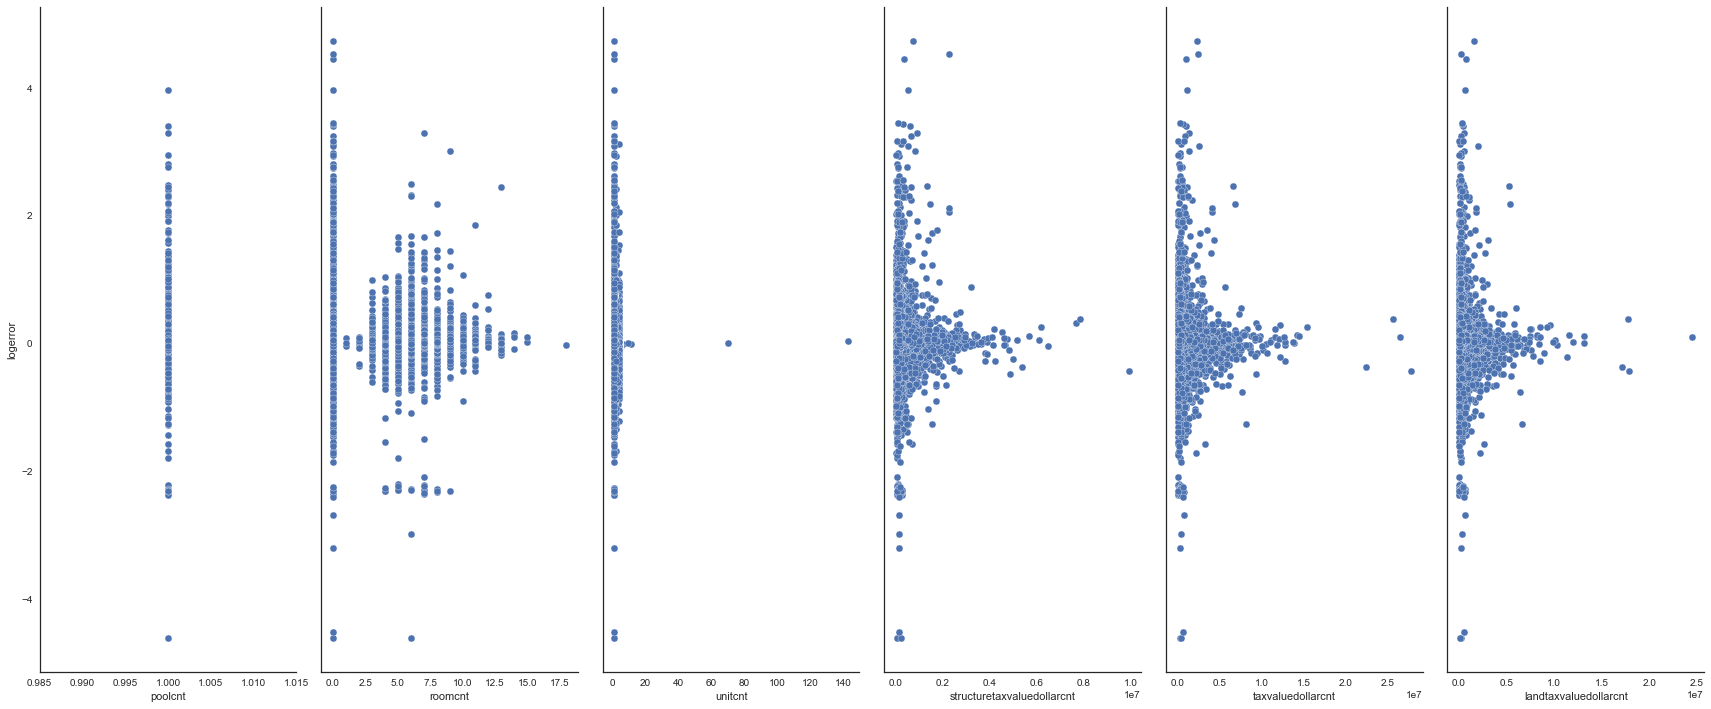

In [134]:
sns.pairplot(full2016_df, x_vars=cnt_col_name[5:], y_vars='logerror', size=10, aspect=0.4);

In [140]:
area_col_name1 = full2016_df.columns[full2016_df.columns.str.contains(pat = 'sqft')]
area_col_name2 = full2016_df.columns[full2016_df.columns.str.contains(pat = 'squarefeet')]
print(area_col_name1, area_col_name2)
display(area_col_name1.shape)
display(area_col_name2.shape)

Index(['basementsqft', 'garagetotalsqft', 'yardbuildingsqft17',
       'yardbuildingsqft26'],
      dtype='object') Index(['finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'lotsizesquarefeet'],
      dtype='object')


(4,)

(8,)

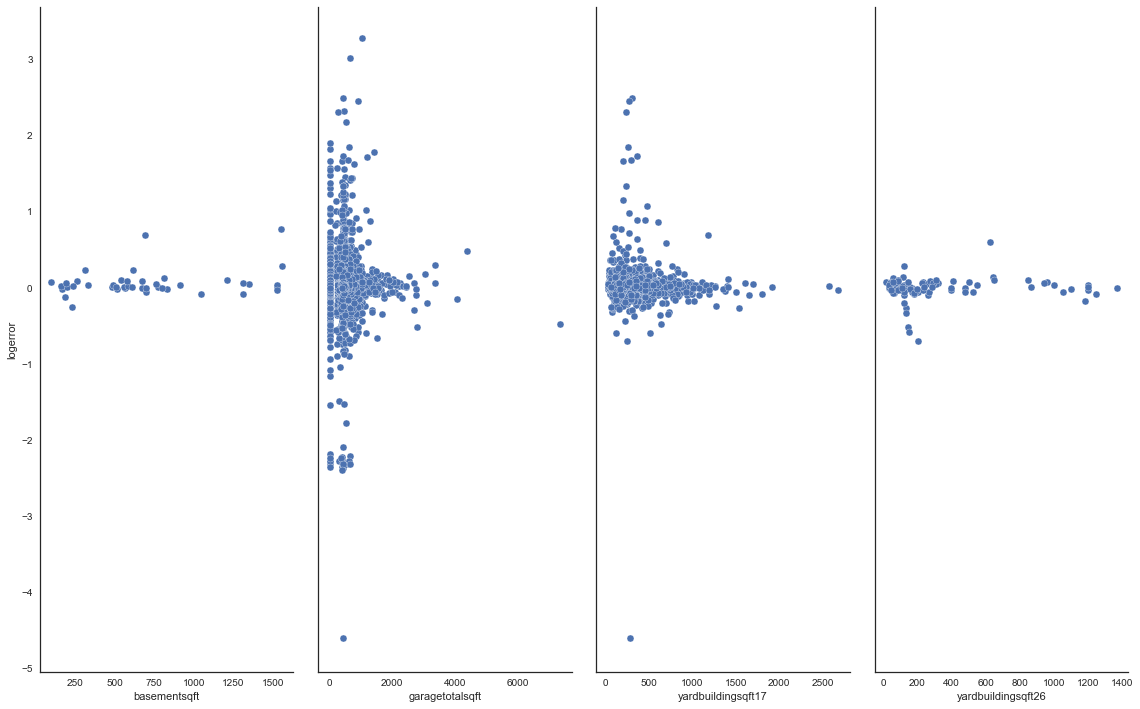

In [141]:
sns.pairplot(full2016_df, x_vars=area_col_name1, y_vars='logerror', size=10, aspect=0.4);

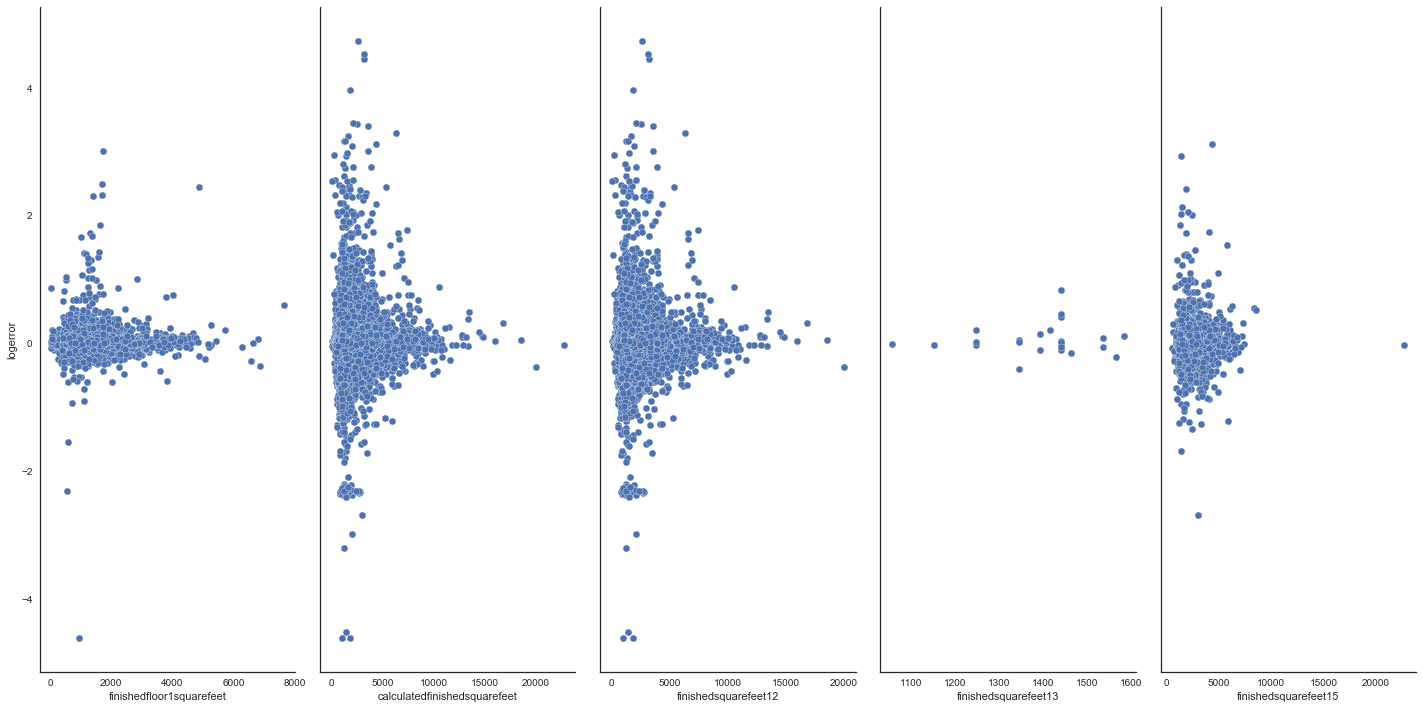

In [142]:
sns.pairplot(full2016_df, x_vars=area_col_name2[0:5], y_vars='logerror', size=10, aspect=0.4);

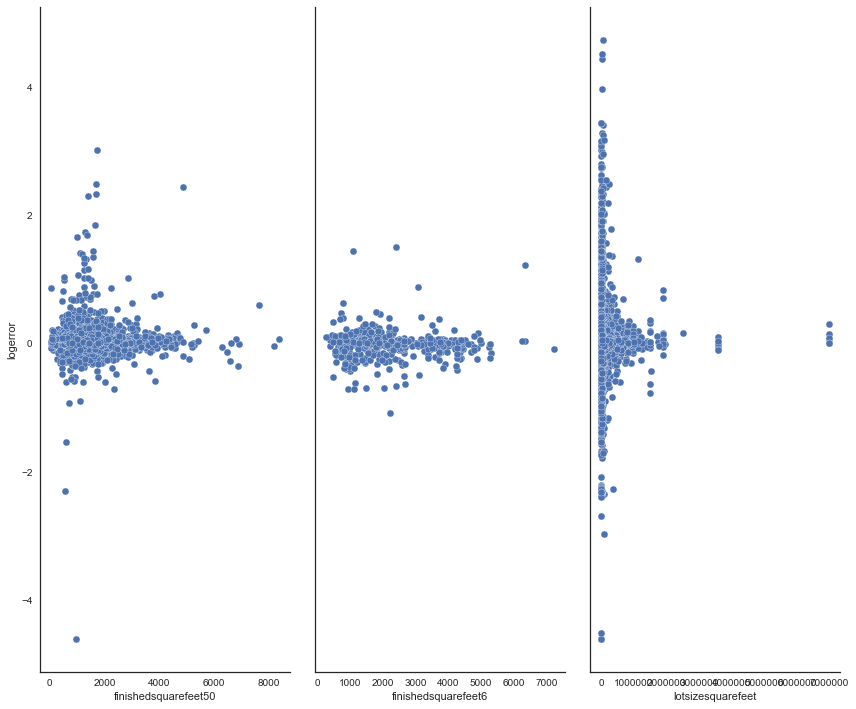

In [143]:
sns.pairplot(full2016_df, x_vars=area_col_name2[5:], y_vars='logerror', size=10, aspect=0.4);

In summary, among all the 56 features, 12 are categorical features that are certain types; 11 are about the count/number of certain items; 12 are related with the area/sqft of certain things; about 21 are something else, such as related with time or location

In [154]:
m = max(full2016_df.logerror)
full2016_df.scalederror = abs(full2016_df.logerror/m)+0.1

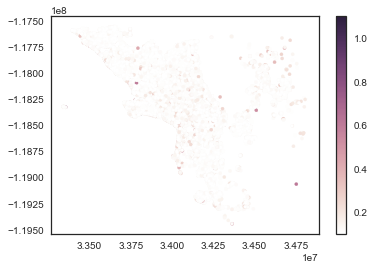

In [155]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(full2016_df.latitude, full2016_df.longitude, c=full2016_df.scalederror, s=10, cmap=cmap)
f.colorbar(points)